In [1]:
import pandas as pd
df= pd.read_csv("sales.csv")
df.head()

,Unnamed: 0,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes,yes
1,2,111,48,16,260,83,Good,65,10,Yes,Yes,yes
2,3,113,35,10,269,80,Medium,59,12,Yes,Yes,yes
3,4,117,100,4,466,97,Medium,55,14,Yes,Yes,no
4,5,141,64,3,340,128,Bad,38,13,Yes,No,no


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   400 non-null    int64 
 1   CompPrice    400 non-null    int64 
 2   Income       400 non-null    int64 
 3   Advertising  400 non-null    int64 
 4   Population   400 non-null    int64 
 5   Price        400 non-null    int64 
 6   ShelveLoc    400 non-null    object
 7   Age          400 non-null    int64 
 8   Education    400 non-null    int64 
 9   Urban        400 non-null    object
 10  US           400 non-null    object
 11  high         400 non-null    object
dtypes: int64(8), object(4)
memory usage: 37.6+ KB


In [5]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num = df_num.iloc[:,1:]
df_num.head()


,CompPrice,Income,Advertising,Population,Price,Age,Education
0,138,73,11,276,120,42,17
1,111,48,16,260,83,65,10
2,113,35,10,269,80,59,12
3,117,100,4,466,97,55,14
4,141,64,3,340,128,38,13


In [39]:
df_cat = df[['ShelveLoc','Urban','US']]
df_cat.head()


,ShelveLoc,Urban,US
0,Bad,Yes,Yes
1,Good,Yes,Yes
2,Medium,Yes,Yes
3,Medium,Yes,Yes
4,Bad,Yes,No


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
SS_X = scaler.fit_transform(df_num)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = df_num.columns
SS_X.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,1.184449
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,0.721723,-1.490113
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.350895,-0.725953
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.103677,0.038208
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-0.947000,-0.343872


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)
df_cat.head()

,ShelveLoc,Urban,US
0,0,1,1
1,1,1,1
2,2,1,1
3,2,1,1
4,0,1,0


In [46]:
df_new = pd.concat([SS_X, df_cat], axis=1)
df_new.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US
0,0.850455,0.155361,0.657177,0.075819,0.177823,-0.699782,1.184449,0,1,1
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,0.721723,-1.490113,1,1,1
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.350895,-0.725953,2,1,1
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.103677,0.038208,2,1,1
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-0.947000,-0.343872,0,1,0


In [47]:
Y = df['high']
X = df_new

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini',max_depth=None)
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [51]:
# prompt: predict the values on training and test data and calculate the accuracies for both

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(Y_train, y_pred_train)
test_accuracy = accuracy_score(Y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 0.6833333333333333


In [52]:
#=========================================================
# cross validation
#=========================================================

training_acc = []
test_acc = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state=i)
    dt.fit(X_train.values,Y_train)
    Y_pred_train = dt.predict(X_train.values)
    Y_pred_test  = dt.predict(X_test.values)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation - Training accuracy:" ,np.mean(training_acc).round(2))
print("Cross validation - Test accuracy:" ,np.mean(test_acc).round(2))



Cross validation - Training accuracy: 1.0
Cross validation - Test accuracy: 0.72


In [53]:
# Count the number of nodes in the tree
node_count = dt.tree_.node_count

# Count the depth of the tree
max_depth = dt.tree_.max_depth

print("Number of nodes:", node_count)
print("Depth of tree:", max_depth)


Number of nodes: 93
Depth of tree: 10


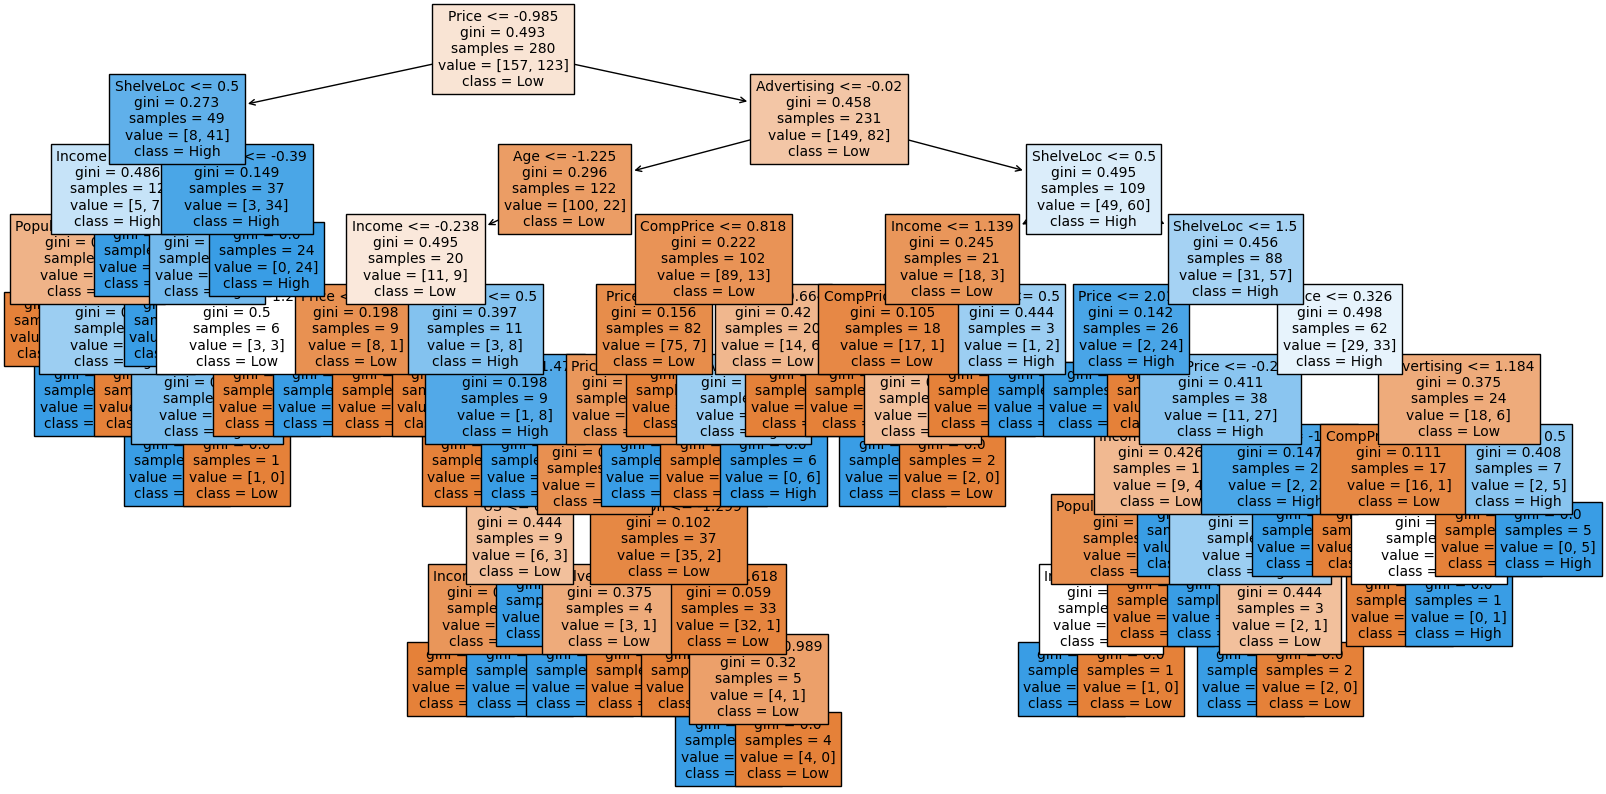

In [54]:
# prompt: plot the decision tree graph for the above model

import matplotlib.pyplot as plt

from sklearn import tree

plt.figure(figsize=(20,10))

tree.plot_tree(dt, feature_names=X.columns, class_names=['Low','High'], filled=True, fontsize=10)
plt.show()
